In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import joblib
import re
import string

In [3]:
df_fake = pd.read_csv("/home/yash_raj/fake-news-detector/Fake.csv")
df_true = pd.read_csv("/home/yash_raj/fake-news-detector/True.csv")

In [4]:
print(f"True news shape: {df_true.shape}")
print(f"Fake news shape: {df_fake.shape}")

True news shape: (21417, 4)
Fake news shape: (23481, 4)


In [5]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
df_true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [8]:
df_fake.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [9]:
#Add label column: 1 for True, 0 for Fake
df_fake["label"] = 0
df_true["label"] = 1

In [10]:
#Combine and shuffle
df = pd.concat([df_true, df_fake]).sample(frac=1).reset_index(drop=True)

#Focus only on 'text' and 'label'
df = df[['text', 'label']]
df.head()

,text,label
0,The fast food industry has been warning those ...,0
1,The Obama administration has been playing loos...,0
2,David Daleiden: We probably have hundreds to ...,0
3,ROME (Reuters) - Italy s upper house Senate ap...,1
4,KUALA LUMPUR (Reuters) - Traces of a deadly ne...,1


/tmp/ipykernel_7869/1139819710.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='magma')


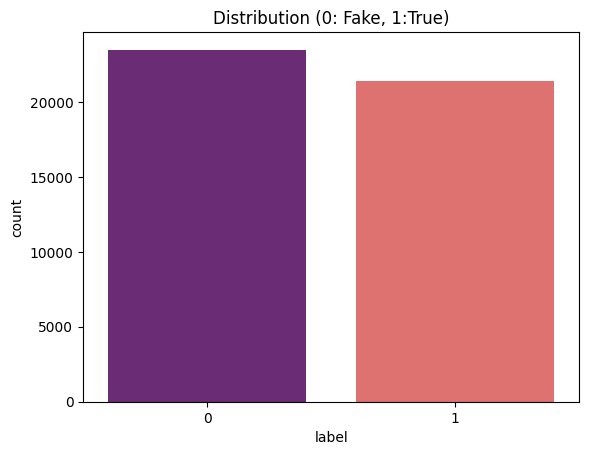

In [11]:
plt.Figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='magma')
plt.title('Distribution (0: Fake, 1:True)')
plt.show()

In [12]:
#split data
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

#Vectorize
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

print("Text converted! Ready for training.")

Text converted! Ready for training.


In [13]:
#Train
model = LogisticRegression()
model.fit(x_train_tfidf, y_train)

#Predict
predictions = model.predict(x_test_tfidf)

#Results
print(f"Accuracy Score: {accuracy_score(y_test, predictions) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy Score: 98.47%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4748
           1       0.98      0.99      0.98      4232

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



In [14]:
joblib.dump(model, 'model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')
print("Model and Vectorizer saved with Fake=0 and True=1 logic.")

Model and Vectorizer saved with Fake=0 and True=1 logic.


In [15]:
cm = confusion_matrix(y_test, predictions)

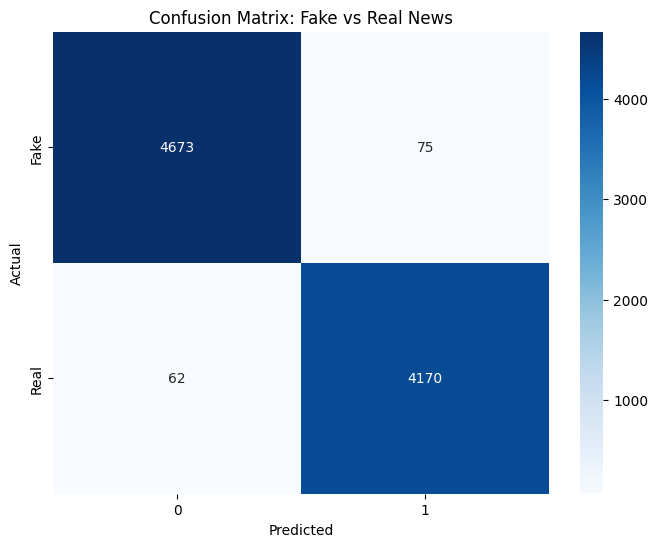

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', yticklabels=['Fake', 'Real'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: Fake vs Real News')
plt.show()

In [17]:
# Get the words(features)
feature_names = vectorizer.get_feature_names_out()

# Get the weights the model assigned to each word
coefs = model.coef_[0]

# Combine and sort
word_importance = pd.DataFrame({'word': feature_names, 'importance': coefs})
print("Top words indicating REAL news:")
print(word_importance.sort_values(by='importance', ascending=False).head(10))
print("\nTop words indicating FAKE news:")
print(word_importance.sort_values(by='importance', ascending=True).head(10))


Top words indicating REAL news:
              word  importance
84516      reuters   29.573719
106749  washington    7.852751
107143   wednesday    7.247291
99175     thursday    6.755485
101638     tuesday    6.484481
83991   republican    5.876768
66618       monday    5.771009
40564       friday    5.620412
65640     minister    4.919061
94279    statement    4.765419

Top words indicating FAKE news:
            word  importance
54404       just   -7.090980
49573      image   -7.002278
38143   featured   -6.855886
82104       read   -6.129906
43303        gop   -6.050731
24631        com   -5.836215
47136    hillary   -5.519062
10474    america   -5.048868
106803     watch   -5.033444
67381         mr   -4.899004


In [18]:
def predict_news(text):
    temp_tfidf = vectorizer.transform([text])
    prediction = model.predict(temp_tfidf)
    return "REAL" if prediction[0] == 1 else "FAKE"

# Test it here
my_news = "BREAKING: NASA finds aliens on Mars!"
print(f"The model says this is: {predict_news(my_news)}")

The model says this is: FAKE
